**Maharashtra Assembly Election Voter Turnout Analysis 2024**

In [1]:
import pandas as pd
import collections
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

In [2]:
voter_df = pd.read_csv("male_female_voter_election_result.csv")
voter_df.describe()

,AC No,Electors Male,Electors Female,Electors Other,Electors Total,Voters Male,Voters Female,Voters Other,Voters Total
count,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000
mean,144.500000,173690.065972,163181.524306,21.184028,336892.774306,116100.892361,106421.243056,6.319444,222528.454861
std,83.282651,37249.814989,31942.922833,41.688627,68507.186321,22899.166964,20463.774617,9.192978,43067.344420
min,1.000000,105551.000000,99834.000000,0.000000,205387.000000,61396.000000,54058.000000,0.000000,117890.000000
25%,72.750000,152177.000000,144957.250000,2.750000,296468.250000,102891.000000,96332.500000,1.000000,200447.000000
50%,144.500000,166828.000000,156490.000000,8.000000,323761.500000,116201.500000,107450.000000,3.000000,224554.000000
75%,216.250000,184623.250000,175469.750000,22.000000,357935.500000,128032.000000,116864.250000,8.250000,243366.250000
max,288.000000,348450.000000,315115.000000,419.000000,663622.000000,203783.000000,183724.000000,62.000000,387520.000000


In [3]:
voter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   AC No             288 non-null    int64 
 1   AC Name           288 non-null    object
 2   Electors Male     288 non-null    int64 
 3   Electors Female   288 non-null    int64 
 4   Electors Other    288 non-null    int64 
 5   Electors Total    288 non-null    int64 
 6   Voters Male       288 non-null    int64 
 7   Voters Female     288 non-null    int64 
 8   Voters Other      288 non-null    int64 
 9   Voters Total      288 non-null    int64 
 10  Total Percentage  288 non-null    object
dtypes: int64(9), object(2)
memory usage: 24.9+ KB


In [4]:
voter_df.shape

(288, 11)

In [5]:
voter_df_new = voter_df.copy()
voter_df_new.shape

(288, 11)

Data Preprocessing - remove % from Total Percentage comlumn.

In [7]:
voter_df_new['Total Percentage'] = voter_df_new['Total Percentage'].str.replace('%', '').astype(float)
voter_df_new

,AC No,AC Name,Electors Male,Electors Female,Electors Other,Electors Total,Voters Male,Voters Female,Voters Other,Voters Total,Total Percentage
0,1,AKKALKUWA,160114,159319,6,319439,115735,113132,4,228871,71.65
1,2,SHAHADA,175043,177588,5,352636,121951,121408,3,243362,69.01
2,3,NANDURBAR,176567,177212,2,353781,118826,118920,0,237746,67.20
3,4,NAWAPUR,142688,153098,0,295786,119107,120915,0,240022,81.15
4,5,SAKRI,186884,178516,7,365407,124149,115610,3,239762,65.62
...,...,...,...,...,...,...,...,...,...,...,...
283,284,SHIRALA,156140,150869,3,307012,124474,116736,3,241213,78.57
284,285,PALUS - KADEGAON,146072,146786,8,292866,118165,113254,4,231423,79.02
285,286,KHANAPUR,177542,173435,19,350996,127852,122294,14,250160,71.27
286,287,TASGAON - KAVATHE MAHANKAL,159076,153606,4,312686,121884,112604,2,234490,74.99


In [105]:
voter_df_new.sum()

AC No                                                           41616
AC Name             AKKALKUWA SHAHADA NANDURBAR NAWAPUR SAKRI DHUL...
Electors Male                                                50022739
Electors Female                                              46996279
Electors Other                                                   6101
Electors Total                                               97025119
Voters Male                                                  33437057
Voters Female                                                30649318
Voters Other                                                     1820
Voters Total                                                 64088195
Total Percentage                                             19140.92
dtype: object

In [108]:
voter_df_new['AC No'].count()

288

In [113]:
total_turnout_percentage = round(voter_df_new['Total Percentage'].sum()/voter_df_new['AC No'].count(), 2)
print("Total Turnout Percentage", total_turnout_percentage,"%")

Total Turnout Percentage 66.46 %


In [128]:
print("Maharastra State")
print("Electors:", "{:,.2f}".format(voter_df_new['Electors Total'].sum()))
print("Votes Polled:", "{:,.2f}".format(voter_df_new['Voters Total'].sum()))
print("Turnout Percentage:", total_turnout_percentage,"%")
print("Total AC's:", voter_df_new['AC No'].count())

Maharastra State
Electors: 97,025,119.00
Votes Polled: 64,088,195.00
Turnout Percentage: 66.46 %
Total AC's: 288


In [116]:
total_female_turnout_percentage = round((voter_df_new['Voters Female'].sum()/voter_df_new['Electors Female'].sum())*100, 2)
print("Female Over Turnout Percentage", total_female_turnout_percentage,"%")

Female Over Turnout Percentage 65.22 %


In [117]:
total_male_turnout_percentage = round((voter_df_new['Voters Male'].sum()/voter_df_new['Electors Male'].sum())*100, 2)
print("Male Over Turnout Percentage", total_male_turnout_percentage,"%")

Male Over Turnout Percentage 66.84 %


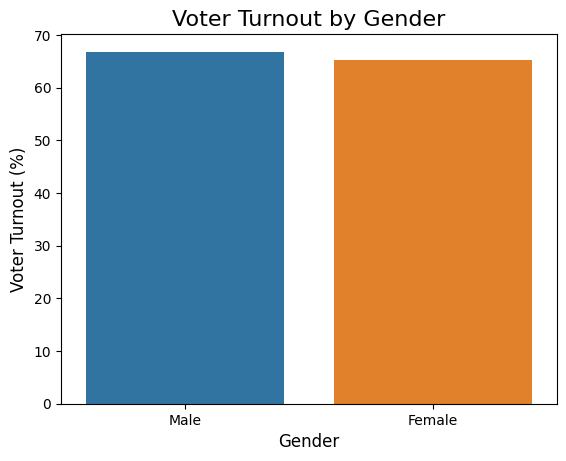

In [131]:
data = {
    'Gender': ['Male', 'Female'],
    'Voter Turnout (%)': [total_male_turnout_percentage, total_female_turnout_percentage]  
    #  turnout percentages for male and female
}

# Create a pandas DataFrame
df = pd.DataFrame(data)

# Create a bar plot using seaborn
sns.barplot(x='Gender', y='Voter Turnout (%)', data=df)

# Adding title and labels
plt.title('Voter Turnout by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Voter Turnout (%)', fontsize=12)

# Show plot
plt.show()

**Top 5 Constituencies with high voting turn over**

In [8]:
top_5_lagest_voter_constituencies = voter_df_new.nlargest(5, "Total Percentage")
top_5_lagest_voter_constituencies

,AC No,AC Name,Electors Male,Electors Female,Electors Other,Electors Total,Voters Male,Voters Female,Voters Other,Voters Total,Total Percentage
274,275,KARVIR,168193,156968,0,325161,144902,131343,0,276245,84.96
272,273,KAGAL,171356,172311,5,343672,143169,140395,4,283568,82.51
73,74,CHIMUR,141153,139674,0,280827,117144,112989,0,230133,81.95
3,4,NAWAPUR,142688,153098,0,295786,119107,120915,0,240022,81.15
72,73,BRAHMAPURI,137752,137914,0,275666,112156,109874,0,222030,80.54


**Top 5 Constituencies with high female voting turn over**

In [9]:
top_5_lagest_female_voter_constituencies = voter_df_new.nlargest(5, "Voters Female")
top_5_lagest_female_voter_constituencies

,AC No,AC Name,Electors Male,Electors Female,Electors Other,Electors Total,Voters Male,Voters Female,Voters Other,Voters Total,Total Percentage
204,205,CHINCHWAD,348450,315115,57,663622,203783,183724,13,387520,58.39
187,188,PANVEL,346402,305586,74,652062,201626,180689,20,382335,58.63
206,207,BHOSARI,328280,280048,97,608425,199030,175379,15,374424,61.54
131,132,NALASOPARA,326522,281884,120,608526,186979,162093,38,349110,57.37
57,58,KAMTHI,251369,250383,18,501770,164488,156895,2,321385,64.05


**Top 5 Constituencies with high male voting turn over**

In [10]:
top_5_lagest_male_voter_constituencies = voter_df_new.nlargest(5, "Voters Male")
top_5_lagest_male_voter_constituencies

,AC No,AC Name,Electors Male,Electors Female,Electors Other,Electors Total,Voters Male,Voters Female,Voters Other,Voters Total,Total Percentage
204,205,CHINCHWAD,348450,315115,57,663622,203783,183724,13,387520,58.39
187,188,PANVEL,346402,305586,74,652062,201626,180689,20,382335,58.63
206,207,BHOSARI,328280,280048,97,608425,199030,175379,15,374424,61.54
131,132,NALASOPARA,326522,281884,120,608526,186979,162093,38,349110,57.37
197,198,SHIRUR,241787,224232,23,466042,169903,151269,8,321180,68.92


**Pune District All AC Dataframe**

In [68]:
def get_pune_district_df():
    pune_district_ac_no = range(195,216)
    pune_district_ac_df = pd.DataFrame()
    for i in pune_district_ac_no:
        filtered_df = voter_df_new[voter_df_new['AC No'] == i]
        pune_district_ac_df = pune_district_ac_df.append(filtered_df, ignore_index=True)

    return pune_district_ac_df
get_pune_district_df()

,AC No,AC Name,Electors Male,Electors Female,Electors Other,Electors Total,Voters Male,Voters Female,Voters Other,Voters Total,Total Percentage
0,195,JUNNAR,165373,160385,6,325764,118117,106470,4,224591,68.94
1,196,AMBEGAON,159469,154773,10,314252,117336,104171,4,221511,70.49
2,197,KHED ALANDI,193719,182892,12,376623,138144,120062,4,258210,68.56
3,198,SHIRUR,241787,224232,23,466042,169903,151269,8,321180,68.92
4,199,DAUND,163917,155383,11,319311,123699,111534,2,235235,73.67
5,200,INDAPUR,174832,166631,22,341485,136411,126213,11,262635,76.91
6,201,BARAMATI,192819,187765,24,380608,142932,129459,11,272402,71.57
7,202,PURANDAR,240538,223446,33,464017,149465,133687,6,283158,61.02
8,203,BHOR,227340,202930,8,430278,156913,134789,2,291704,67.79
9,204,MAVAL,197436,188723,13,386172,144214,136102,3,280319,72.59


**Pune District Voter Analysis**

In [67]:
pune_district_ac_df = get_pune_district_df()
pune_district_ac_df.sum()

AC No                                                            4305
AC Name             JUNNAR AMBEGAON KHED ALANDI SHIRUR DAUND INDAP...
Electors Male                                                 4579216
Electors Female                                               4269569
Electors Other                                                    805
Electors Total                                                8849590
Voters Male                                                   2854698
Voters Female                                                 2598282
Voters Other                                                      196
Voters Total                                                  5453176
Total Percentage                                              1308.28
dtype: object

In [110]:
pune_district_turnout_percentage= round(pune_district_ac_df['Total Percentage'].sum()/pune_district_ac_df['AC No'].count(), 2)
print("Pune District Total Turnout Percentage", pune_district_turnout_percentage,"%")

Pune District Total Turnout Percentage 62.3 %


In [120]:
pune_district_female_turnout_percentage = round((pune_district_ac_df['Voters Female'].sum()/pune_district_ac_df['Electors Female'].sum())*100, 2)
print("Pune District Female Voter Turnout Percentage", pune_district_female_turnout_percentage,"%")

Pune District Female Voter Turnout Percentage 60.86 %


In [121]:
pune_district_male_turnout_percentage = round((pune_district_ac_df['Voters Male'].sum()/pune_district_ac_df['Electors Male'].sum())*100, 2)
print("Pune District Male Voter Turnout Percentage", pune_district_male_turnout_percentage,"%")

Pune District Male Voter Turnout Percentage 62.34 %


In [126]:
print("Pune District")
print("Electors:", "{:,.2f}".format(pune_district_ac_df['Electors Total'].sum()))
print("Votes Polled:", "{:,.2f}".format(pune_district_ac_df['Voters Total'].sum()))
print("Turnout Percentage:", pune_district_turnout_percentage,"%")
print("Total AC's:", pune_district_ac_df['AC No'].count())


Pune District
Electors: 8,849,590.00
Votes Polled: 5,453,176.00
Turnout Percentage: 62.3 %
Total AC's: 21
